In [5]:
import pandas as pd
import numpy as np
#from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

In [6]:
df=pd.read_excel('C:\\Users\\Harisankar.Suresh\\Desktop\\New folder\\A1C2C0088854.xlsx',sheet_name='step')

In [7]:
df=df[(df['Step Index']==2)]
df.columns

Index(['Cycle Index', 'Step Index', 'Step Number', 'Step Type', 'Step Time',
       'Oneset Date', 'End Date', 'Capacity(Ah)', 'Spec. Cap.(mAh/g)',
       'Chg. Cap.(Ah)', 'Chg. Spec. Cap.(mAh/g)', 'DChg. Cap.(Ah)',
       'DChg. Spec. Cap.(mAh/g)', 'Net DChg. Cap.(Ah)', 'Energy(Wh)',
       'Spec. Energy(mWh/g)', 'Chg. Energy(Wh)', 'Chg. Spec. Energy(mWh/g)',
       'DChg. Energy(Wh)', 'DChg. Spec. Energy(mWh/g)', 'Net DChg. Energy(Wh)',
       'Super Capacitor(F)', 'Oneset Volt.(V)', 'Chg. Oneset Volt.(V)',
       'DChg. Oneset Volt.(V)', 'End Volt.(V)', 'End of Chg.Volt.(V)',
       'End of DChg.Volt.(V)', 'Chg. Med. Volt.(V)', 'DChg. Med. Volt.(V)',
       'Starting current(A)', 'Termination current(A)', 'DCIR(mΩ)'],
      dtype='object')

In [8]:
df2=df.loc[2:900,['Capacity(Ah)']]

In [9]:
df2.reset_index(drop=True,inplace=True)

In [10]:
df2

,Capacity(Ah)
0,2.7402
1,2.7494
2,2.7936
3,2.7971
4,2.7969
...,...
219,2.6996
220,2.6985
221,2.7423
222,2.7442


In [11]:
df2['SOH%']=(df2['Capacity(Ah)']/2.9)*100

In [12]:
df2

,Capacity(Ah),SOH%
0,2.7402,94.489655
1,2.7494,94.806897
2,2.7936,96.331034
3,2.7971,96.451724
4,2.7969,96.444828
...,...,...
219,2.6996,93.089655
220,2.6985,93.051724
221,2.7423,94.562069
222,2.7442,94.627586


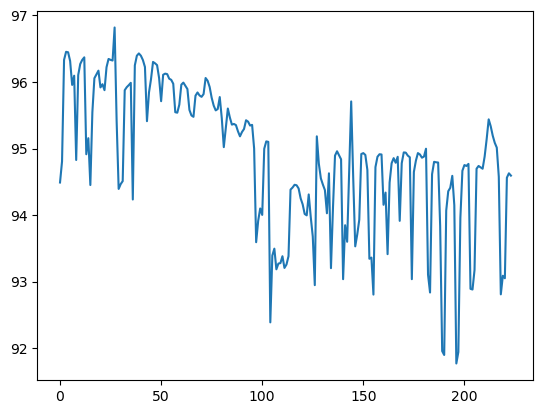

In [13]:
plt.plot(df2['SOH%'])

In [14]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller


In [15]:
def adfuller_test(SOH):
    result=adfuller(SOH)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adfuller_test(df2['SOH%'])

ADF Test Statistic : -1.601327503376029
p-value : 0.48292658652511433
#Lags Used : 6
Number of Observations Used : 217
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
df2['SOH1diff'] = df2['SOH%'] - df2['SOH%'].shift(1)

In [18]:
adfuller_test(df2['SOH1diff'].dropna())

ADF Test Statistic : -12.580499571217155
p-value : 1.9151473944305154e-23
#Lags Used : 5
Number of Observations Used : 217
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Text(0.5, 0, 'Index')

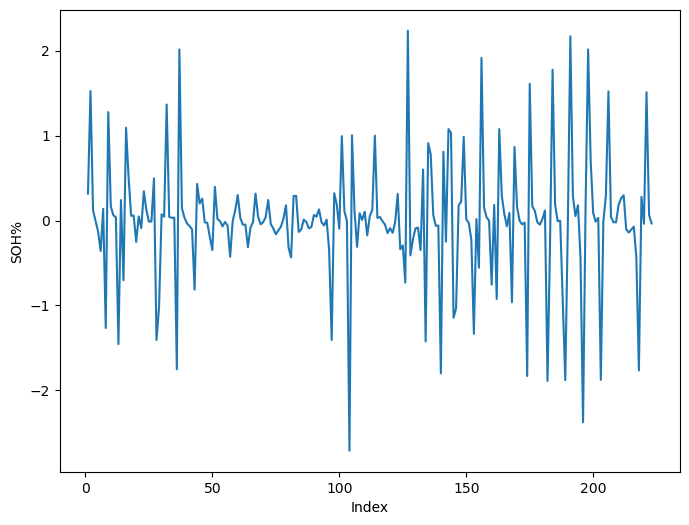

In [19]:
df2['SOH1diff'].plot(figsize=(8,6))
plt.ylabel("SOH%")
plt.xlabel('Index')

In [20]:
import statsmodels.api as sm

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

c:\Users\Harisankar.Suresh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


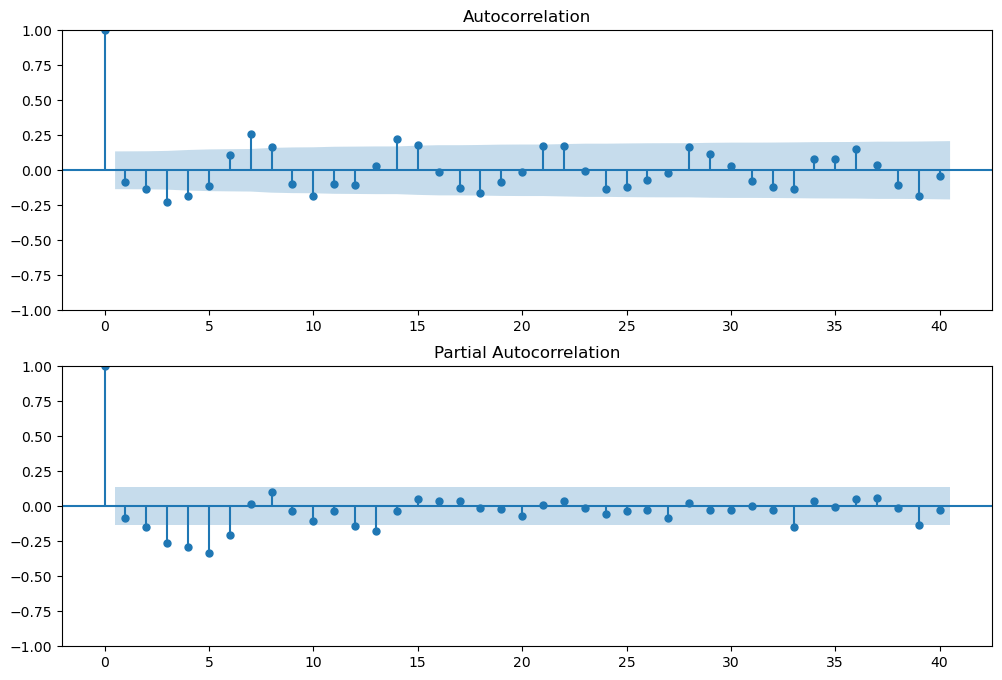

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['SOH1diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['SOH1diff'].iloc[13:],lags=40,ax=ax2)

In [36]:
df2

,Capacity(Ah),SOH%,SOH1diff,forecast
0,2.7402,94.489655,NaN,NaN
1,2.7494,94.806897,0.317241,NaN
2,2.7936,96.331034,1.524138,NaN
3,2.7971,96.451724,0.120690,NaN
4,2.7969,96.444828,-0.006897,NaN
...,...,...,...,...
219,2.6996,93.089655,0.279310,NaN
220,2.6985,93.051724,-0.037931,NaN
221,2.7423,94.562069,1.510345,NaN
222,2.7442,94.627586,0.065517,NaN


In [37]:
from statsmodels.tsa.arima.model import ARIMA
# 1,1,1 ARIMA Model
model = ARIMA(df2['SOH%'], order=(5,1,7))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   SOH%   No. Observations:                  224
Model:                 ARIMA(5, 1, 7)   Log Likelihood                -191.249
Date:                Tue, 27 Jun 2023   AIC                            408.499
Time:                        14:38:58   BIC                            452.792
Sample:                             0   HQIC                           426.380
                                - 224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0546      4.210     -0.013      0.990      -8.306       8.197
ar.L2         -0.7332      3.041     -0.241      0.810      -6.694       5.228
ar.L3         -0.3334      5.447     -0.061      0.9

c:\Users\Harisankar.Suresh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\Harisankar.Suresh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

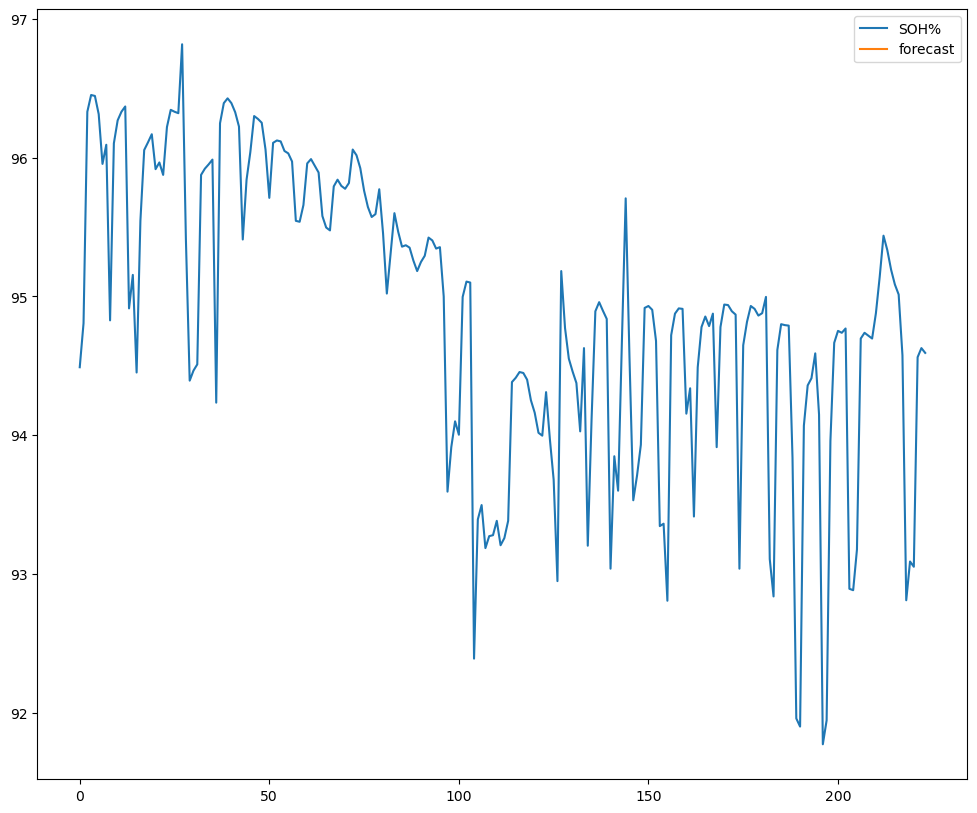

In [38]:
df2['forecast']=model_fit.predict(start=500,end=997,dynamic=True)
df2[['SOH%','forecast']].plot(figsize=(12,10))

In [26]:
import statsmodels.api as sm


In [46]:

# model=sm.tsa.statespace.SARIMAX(df2['SOH'],order=(1, 1, 1),seasonal_order=(0,1,1,12))
model=sm.tsa.statespace.SARIMAX(df2['SOH%'],order=(4, 1, 4),seasonal_order=(0,0,0,0))
results=model.fit()

<Axes: >

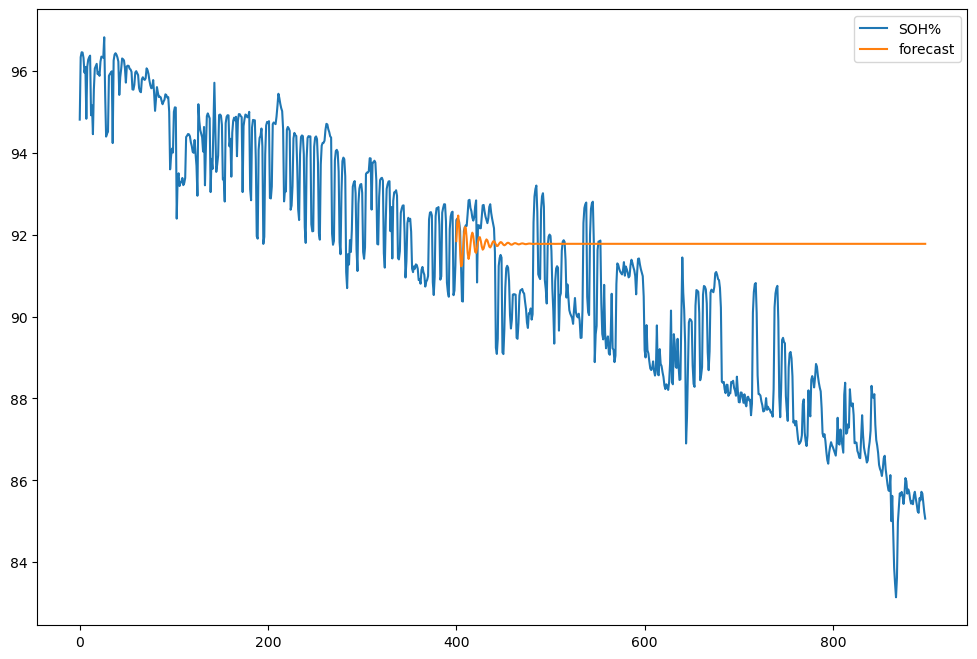

In [ ]:

df2['forecast']=results.predict(start=400,end=900,dynamic=True,Trend='t')
df2[['SOH%','forecast']].plot(figsize=(12,8))
 

In [ ]:
df2['forecast']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
894    91.774278
895    91.774278
896    91.774278
897    91.774278
898    91.774278
Name: forecast, Length: 899, dtype: float64

In [ ]:
df

,Cycle Index,Step Index,Step Number,Step Type,Step Time,Oneset Date,End Date,Capacity(Ah),Spec. Cap.(mAh/g),Chg. Cap.(Ah),...,Chg. Oneset Volt.(V),DChg. Oneset Volt.(V),End Volt.(V),End of Chg.Volt.(V),End of DChg.Volt.(V),Chg. Med. Volt.(V),DChg. Med. Volt.(V),Starting current(A),Termination current(A),DCIR(mΩ)
1,1,2,2,CCCV Chg,01:53:19,2022-08-03 11:47:21,2022-08-03 13:40:39,2.4454,2445434.22,2.4454,...,3.5075,0.0,4.2004,4.2004,0.0,3.8814,0.0,1.4501,0.2098,44.27
5,2,2,6,CCCV Chg,02:06:21,2022-08-03 14:53:30,2022-08-03 16:59:50,2.7402,2740214.67,2.7402,...,3.2638,0.0,4.2004,4.2004,0.0,3.8312,0.0,1.4501,0.2090,58.13
9,3,2,10,CCCV Chg,02:04:18,2022-08-03 18:15:28,2022-08-03 20:19:45,2.7494,2749375.78,2.7494,...,3.2651,0.0,4.2007,4.2007,0.0,3.8234,0.0,1.4497,0.2098,57.74
13,4,2,14,CCCV Chg,02:05:54,2022-08-03 21:33:35,2022-08-03 23:39:28,2.7936,2793574.22,2.7936,...,3.1640,0.0,4.2007,4.2007,0.0,3.8157,0.0,1.4501,0.2098,52.34
17,5,2,18,CCCV Chg,02:06:07,2022-08-04 00:53:21,2022-08-04 02:59:27,2.7971,2797124.89,2.7971,...,3.1606,0.0,4.2007,4.2007,0.0,3.8147,0.0,1.4497,0.2094,52.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,1786,2,7142,CCCV Chg,01:52:25,2023-03-31 00:53:13,2023-03-31 02:45:37,2.1723,2172324.89,2.1723,...,3.3175,0.0,4.1998,4.1998,0.0,3.8932,0.0,1.4494,0.2098,69.55
7145,1787,2,7146,CCCV Chg,01:51:55,2023-03-31 03:46:30,2023-03-31 05:38:24,2.1632,2163215.78,2.1632,...,3.3215,0.0,4.1998,4.1998,0.0,3.8953,0.0,1.4505,0.2098,70.11
7149,1788,2,7150,CCCV Chg,01:53:32,2023-03-31 06:39:09,2023-03-31 08:32:40,2.1958,2195820.89,2.1958,...,3.3224,0.0,4.2001,4.2001,0.0,3.9046,0.0,1.4497,0.2098,69.67
7153,1789,2,7154,CCCV Chg,01:52:29,2023-03-31 09:35:14,2023-03-31 11:27:42,2.2738,2273760.89,2.2738,...,3.2635,0.0,4.2007,4.2007,0.0,3.8687,0.0,1.4501,0.2094,66.27


In [ ]:
df=df.reset_index()

In [ ]:
df3=df.loc[200:300,['Capacity(Ah)']]

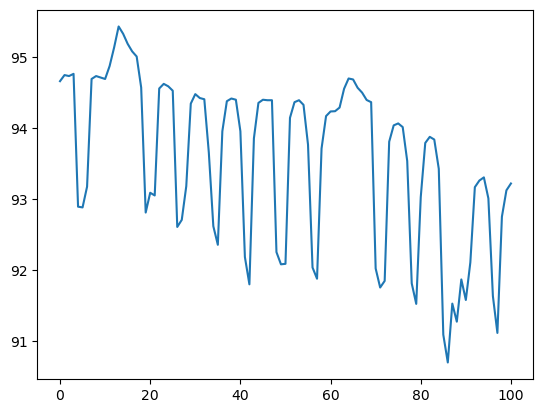

In [ ]:
df3.reset_index(drop=True,inplace=True)
df3['SOH%']=(df3['Capacity(Ah)']/2.9)*100
plt.plot(df3['SOH%'])


In [ ]:
df3

,Capacity(Ah),SOH%
0,2.7453,94.665517
1,2.7478,94.751724
2,2.7474,94.737931
3,2.7483,94.768966
4,2.6939,92.893103
...,...,...
96,2.6573,91.631034
97,2.6422,91.110345
98,2.6898,92.751724
99,2.7006,93.124138


<Axes: >

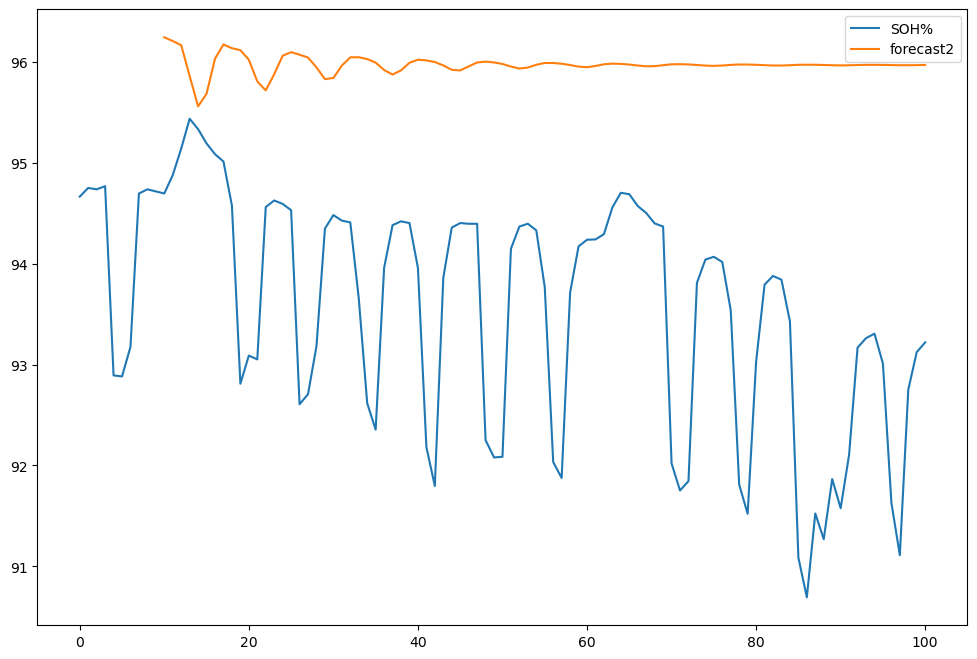

In [ ]:

df3['forecast2']=results.predict(start=10,end=100,dynamic=True,Trend='t')
df3[['SOH%','forecast2']].plot(figsize=(12,8))
 

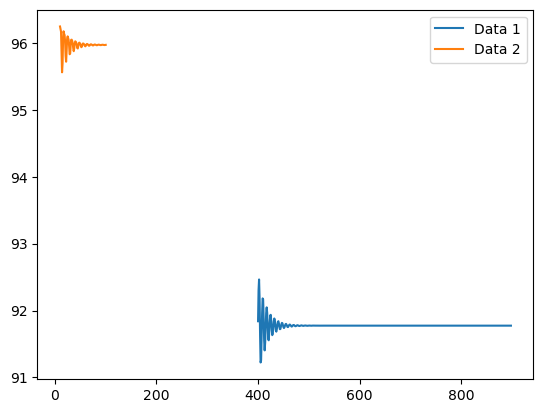

In [ ]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the first data set
ax.plot(df2['forecast'], label='Data 1')

# Plot the second data set
ax.plot(df3['forecast2'] ,label='Data 2')

# Add a legend
ax.legend()

# Display the plot
plt.show()


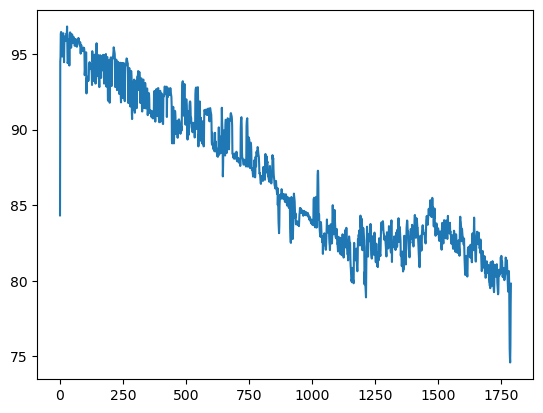

In [ ]:
df4=df.loc[:,['Capacity(Ah)']]
df4['SOH%']=(df4['Capacity(Ah)']/2.9)*100
plt.plot(df4['SOH%'])

In [ ]:
df4['forecast4']=results.predict(start=10,end=1750,dynamic=True,Trend='t')


<Axes: >

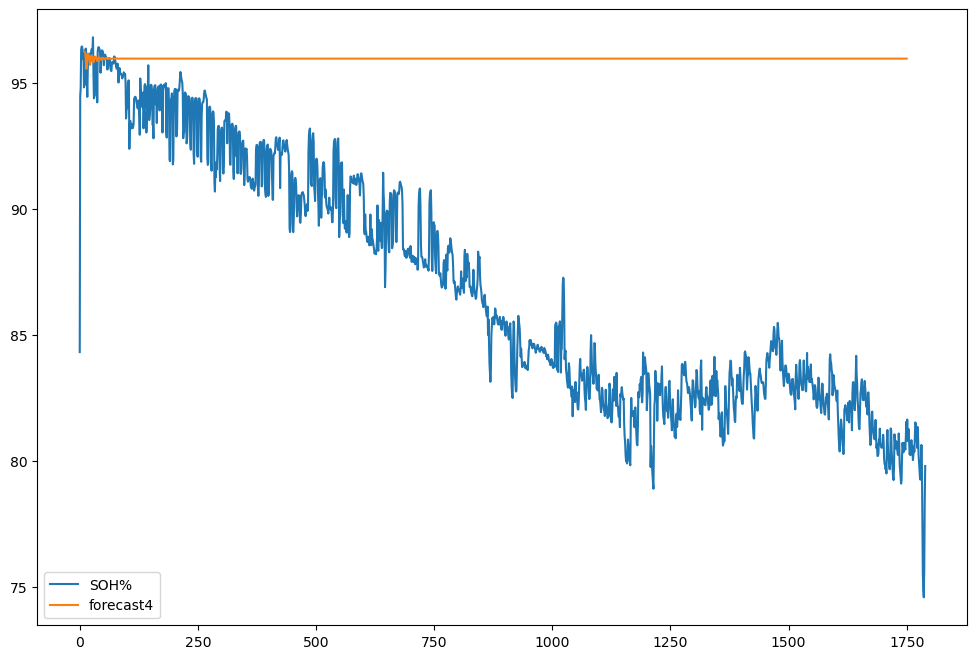

In [ ]:
df4[['SOH%','forecast4']].plot(figsize=(12,8))

In [ ]:
df4['forecast4'].head(15)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10    96.245512
11    96.208073
12    96.167241
13    95.861227
14    95.560607
Name: forecast4, dtype: float64

In [ ]:
df4

,Capacity(Ah),SOH%,forecast4
0,2.4454,84.324138,NaN
1,2.7402,94.489655,NaN
2,2.7494,94.806897,NaN
3,2.7936,96.331034,NaN
4,2.7971,96.451724,NaN
...,...,...,...
1785,2.1723,74.906897,NaN
1786,2.1632,74.593103,NaN
1787,2.1958,75.717241,NaN
1788,2.2738,78.406897,NaN
